In [113]:
from OLS.OLS import * 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
dataset_name = 'housing.data'
dataset_columns = ['CR', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'BRATIO', 'LSTAT', 'MEDV']

dataset = pd.read_csv('housing.data', 
                      delim_whitespace=True, 
                      header=None, 
                      names=dataset_columns)

dataset['TARGET'] = np.newaxis

In [139]:
model = OLS(1000, 0.001, 0.000001)

[autoreload of OLS.OLS failed: Traceback (most recent call last):
  File "/Users/yura_hb/miniconda3/envs/bipyt/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/yura_hb/miniconda3/envs/bipyt/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/yura_hb/miniconda3/envs/bipyt/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/yura_hb/miniconda3/envs/bipyt/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call

In [135]:
model.fit(np.array(dataset[['RM']], dtype=np.float), np.array(dataset['LSTAT'], dtype=np.float))

[[1.    6.575]
 [1.    6.421]
 [1.    7.185]
 ...
 [1.    6.976]
 [1.    6.794]
 [1.    6.03 ]]


In [136]:
print(model.cost_records)
model.slopes

[50520697.04986917, 47819517.25005758, 45262761.02909533, 42842706.51295941, 40552044.691917464, 38383857.34597392, 36331596.150573544, 34389062.899456635, 32550390.78493632, 30810026.679060258, 29162714.362142894, 27603478.648015335, 26127610.358048044, 24730652.09856529, 23408384.798696466, 22156814.968006037, 20972162.635418046, 19850849.933008138, 18789490.290184494, 17784878.205621716, 16833979.566057283, 15933922.48271154, 15081988.617655294, 14275604.973929357, 13512336.124620514, 12789876.857424304, 12106045.21247992, 11458775.892450081, 10846114.024943253, 10266209.25843949, 9717310.17388852, 9197758.99510211, 8705986.58196505, 8240507.6913434435, 7799916.491377272, 7382882.315609589, 6988145.644129132, 6614514.299588511, 6260859.846609347, 5926114.1836999245, 5609266.317392216, 5309359.308855669, 5025487.383765946, 4756793.19669987, 4502465.241794575, 4261735.401850537, 4033876.6284763645, 3818200.74626894, 3614056.3743971344, 3420826.9593118904, 3237928.912641118, 3064809.84

array([[1.7387682],
       [1.7387682]])

In [77]:
dataset[['RM', 'LSTAT']]

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33
...,...,...
501,6.593,9.67
502,6.120,9.08
503,6.976,5.64
504,6.794,6.48


In [119]:
features_copy = np.ones((dataset[['RM']].shape[0], dataset[['LSTAT']].shape[1] + 1))

features_copy[:, 1:] = np.array(dataset[['RM']])

predict = model.predict(features_copy)
predict

array([[13.1737527 ],
       [12.90592988],
       [14.23460936],
       [13.90939592],
       [14.16852321],
       [12.92158186],
       [12.19463419],
       [12.47289167],
       [11.53203356],
       [12.18072131],
       [12.82940907],
       [12.18941686],
       [11.98072375],
       [12.0850703 ],
       [12.34071936],
       [11.88507274],
       [12.06072277],
       [12.15637378],
       [11.22768943],
       [11.69898804],
       [11.42594789],
       [12.11289605],
       [12.42071839],
       [11.84855144],
       [12.04159257],
       [11.47638206],
       [11.84855144],
       [12.25550301],
       [13.03462396],
       [13.34592452],
       [11.67464052],
       [12.29898074],
       [12.08680941],
       [11.6537712 ],
       [12.34071936],
       [12.05724455],
       [11.8972465 ],
       [11.91289848],
       [12.11463516],
       [13.20853489],
       [13.95461277],
       [13.51287901],
       [12.46767434],
       [12.54071693],
       [12.29376341],
       [11

In [39]:
np.array([10, 20]).reshape(2, 1)

array([[10],
       [20]])

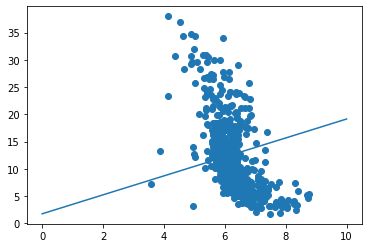

In [137]:
plt.scatter(dataset['RM'], dataset['LSTAT'])

space = np.linspace(0.0, 10.0, num=100)
plt.plot(space, model.slopes[0] + model.slopes[1] * space)


In [47]:
dataset.corr()

,CR,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BRATIO,LSTAT,MEDV
CR,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
plt.plot(dataset['CR'], predict)
plt.plot(dataset['ZN'], predict)

In [71]:
polyfit_result = np.polyfit(dataset['RM'], np.array(dataset['LSTAT']), deg=0)
polyfit_result

array([12.65306324])

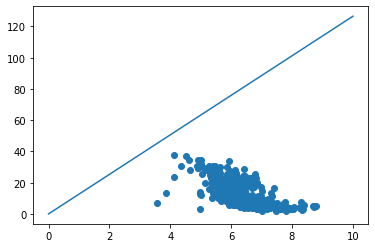

In [138]:
plt.scatter(dataset['RM'], np.array(dataset['LSTAT']))

space = np.linspace(0.0, 10, num=100)
plt.plot(space, polyfit_result[0] * space)